In [1]:
import pandas as pd
df = pd.read_csv('Citywide_Payroll_Data__Fiscal_Year_.csv')
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


1. Add column for tenure years
2. Show relationship between overtime and tenure -- scrollytelling. 
   - Use second chart to narrow down to the top three agencies that pay the most in overtime

#### Cleaning the data + adding a column for tenure

The database includes people whose work locations are outside of NYC. For this analyses, we're only including employees with work locations in NYC boroughs. Since Staten Island wasn't listed (unless included in the "other" location, this is filtered down to Queens, Manhattan, Bronx and Brooklyn.

In [2]:
boroughs = ['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX']

In [3]:
df = df[df.work_location_borough.isin(boroughs)]

In [4]:
df['agency_start_date'] = pd.to_datetime(df.agency_start_date, errors='coerce')
df['today'] = pd.to_datetime('today')
df['tenure_years'] = (df.today - df.agency_start_date).astype('timedelta64[Y]')

In [5]:
from plotnine import *

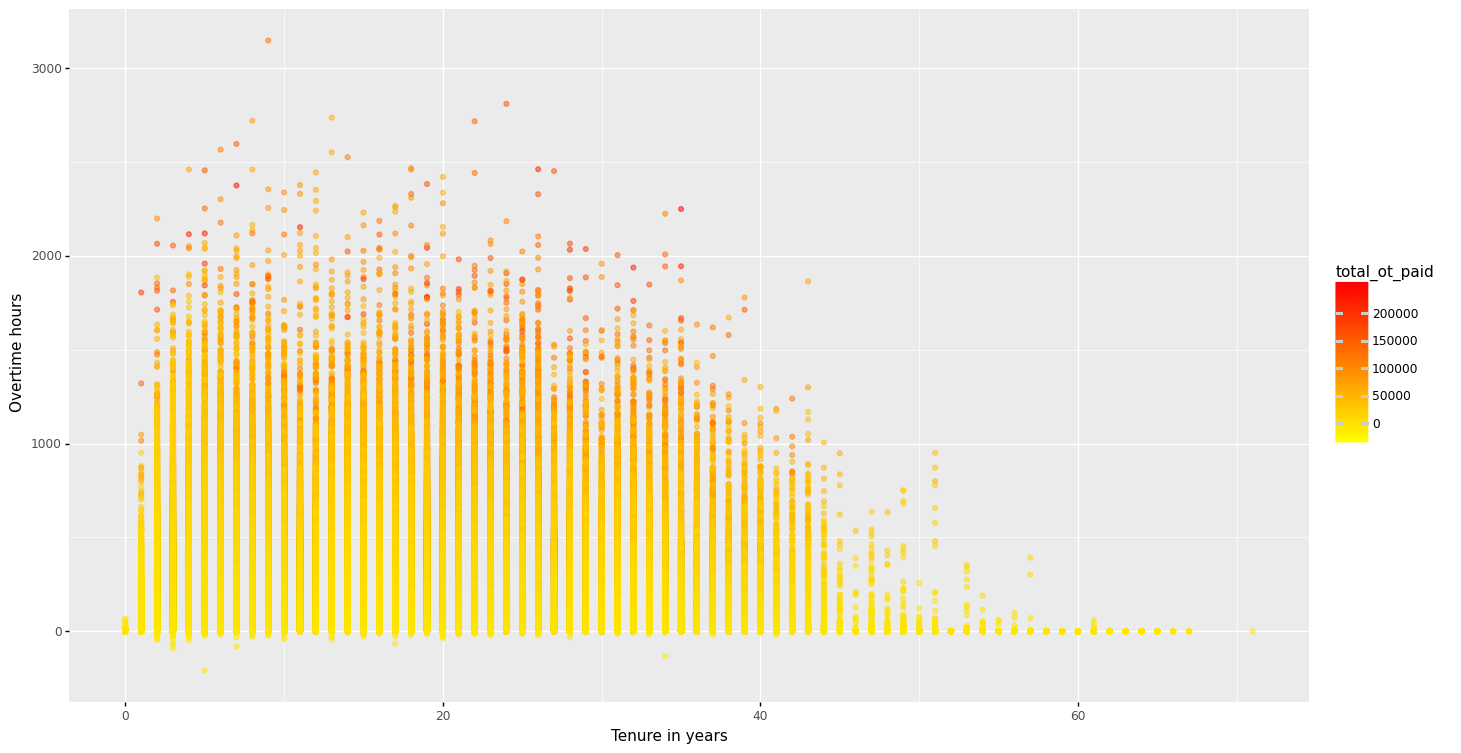

<ggplot: (272388985)>

In [6]:
(
    ggplot(df.query('tenure_years < 75'), 
           aes(x='tenure_years', y='ot_hours', color='total_ot_paid')) +
        geom_point(alpha=.5) +
#         facet_grid('leave_status_as_of_june_30~fiscal_year') +
        scale_color_gradient(low='yellow',high='red') + 
        labs(
#             title = 'Overtime earned at NYPD, FD and Dept of Corrections',
            y = 'Overtime hours',
            x = 'Tenure in years'
        ) + 
        theme(figure_size=(16,9))

)    

In [12]:
df.query('regular_hours > 0').query('ot_hours/regular_hours>0').query('ot_hours>0').query('tenure_years < 40').query('leave_status_as_of_june_30 == "CEASED"')

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,today,tenure_years
24,2017,NaN,ADMIN FOR CHILDREN'S SVCS,ABUBAKAR,NAJEEB,S,2016-08-29,MANHATTAN,CLERICAL ASSOCIATE,CEASED,"37,251.00",per Annum,"1,328.75","27,111.19",53.50,"1,255.48","2,603.55",2022-05-25 17:48:14.052434,5.00
26,2017,NaN,ADMIN FOR CHILDREN'S SVCS,ACEVEDO,ALEXIS,R,2016-03-21,BRONX,CHILD PROTECTIVE SPECIALIST,CEASED,"45,874.00",per Annum,262.00,"9,711.67",20.25,803.49,57.75,2022-05-25 17:48:14.052434,6.00
52,2017,NaN,ADMIN FOR CHILDREN'S SVCS,ADAMS,VANESHA,L,2016-08-08,MANHATTAN,CHILD PROTECTIVE SPECIALIST,CEASED,"51,315.00",per Annum,893.55,"23,248.06",41.25,"1,280.16",105.96,2022-05-25 17:48:14.052434,5.00
68,2017,NaN,ADMIN FOR CHILDREN'S SVCS,ADENIYI,EKUNDAYO,A,2016-05-16,BROOKLYN,CHILD PROTECTIVE SPECIALIST,CEASED,"45,874.00",per Annum,142.75,"6,095.18",12.75,734.44,5.02,2022-05-25 17:48:14.052434,6.00
100,2017,NaN,ADMIN FOR CHILDREN'S SVCS,AHL,DETTA,J,2016-06-27,MANHATTAN,CONGREG CARE SPEC - ACS,CEASED,"39,777.00",per Annum,"1,710.25","37,609.61",69.50,"1,969.49","2,771.28",2022-05-25 17:48:14.052434,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766041,2021,67.00,ADMIN FOR CHILDREN'S SVCS,LEUNG,BILL,Y,2019-07-22,BROOKLYN,CHILD PROTECTIVE SPECIALIST,CEASED,"55,125.00",per Annum,70.00,326.87,8.00,243.55,2.28,2022-05-25 17:48:14.052434,2.00
2767704,2021,846.00,DEPT OF PARKS & RECREATION,RICHARDSON,MICHAEL,C,2019-09-30,BROOKLYN,JOB TRAINING PARTICIPANT,CEASED,15.45,per Hour,32.00,494.40,3.50,54.08,0.00,2022-05-25 17:48:14.052434,2.00
2772852,2021,740.00,DEPARTMENT OF EDUCATION ADMIN,PEREZ,ADELWISA,B,2008-04-06,QUEENS,STAFF NURSE,CEASED,59.29,per Hour,11.58,686.78,0.50,32.84,-253.14,2022-05-25 17:48:14.052434,14.00
2811494,2021,846.00,DEPT OF PARKS & RECREATION,JOU,WILLIAM,Z,2020-02-16,QUEENS,CITY PARK WORKER,CEASED,16.63,per Hour,12.50,207.83,3.00,49.88,0.00,2022-05-25 17:48:14.052434,2.00


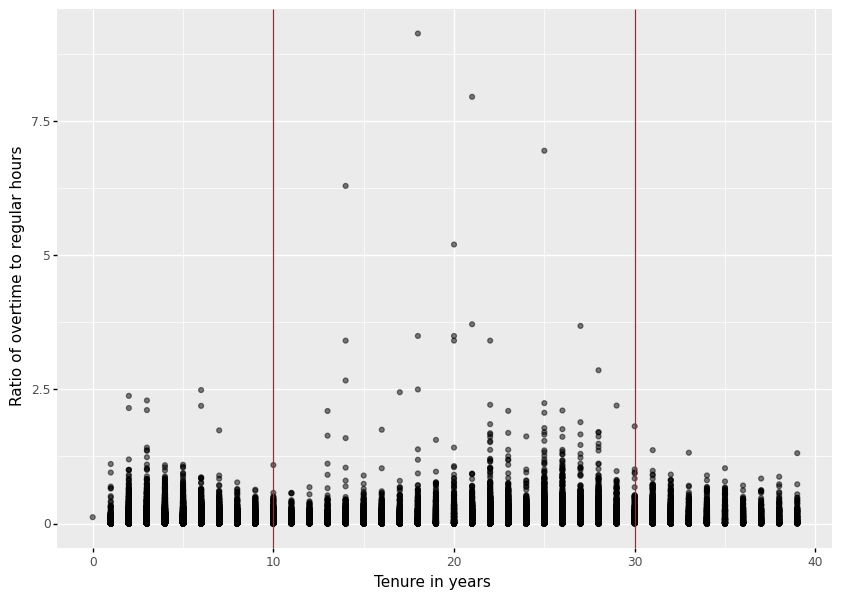

<ggplot: (362337284)>

In [11]:
chart = (
    ggplot(df.query('regular_hours > 0').query('ot_hours/regular_hours>0').query('ot_hours>0').query('tenure_years < 40').query('leave_status_as_of_june_30 == "CEASED"'), 
           aes(x='tenure_years', y='ot_hours/regular_hours')) +
        geom_point(alpha = 0.5) +
        geom_vline(aes(xintercept=10), color='red') +
        geom_vline(aes(xintercept=30), color='red') +
        labs(
            y = 'Ratio of overtime to regular hours',
            x = 'Tenure in years'
        ) + 
        theme(figure_size=(10,7))

)

chart

In [13]:
chart.save('tenure_ot.svg')

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 7 in image.
/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: tenure_ot.svg


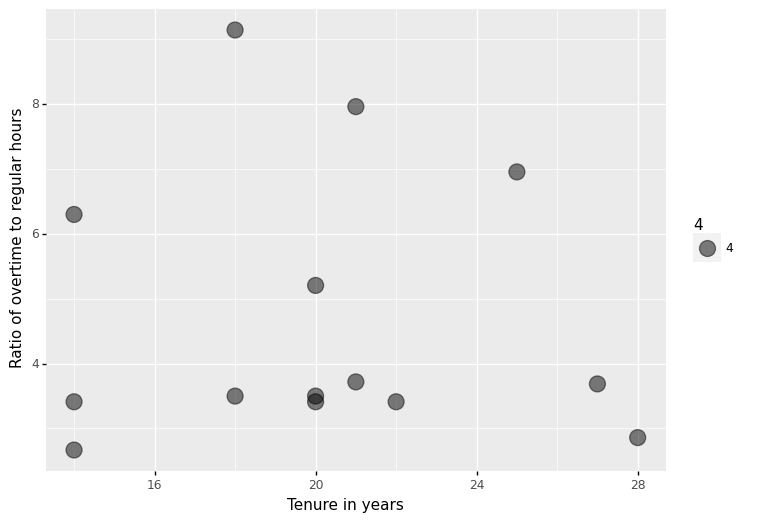

<ggplot: (369831096)>

In [21]:
chart = (
    ggplot(df.query('regular_hours > 0').query('ot_hours/regular_hours>2.5').query('ot_hours>0').query('tenure_years < 40').query('leave_status_as_of_june_30 == "CEASED"'), 
           aes(x='tenure_years', y='ot_hours/regular_hours')) +
        geom_point(aes(size = 4),alpha=0.5) +
#         geom_vline(aes(xintercept=10), color='red') +
#         geom_vline(aes(xintercept=30), color='red') +
        labs(
            y = 'Ratio of overtime to regular hours',
            x = 'Tenure in years'
        ) + 
        theme(figure_size=(8,6))

)

chart

In [22]:
chart.save('top_ot.svg')

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8 x 6 in image.
/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: top_ot.svg
